Stock Prediction

Install yfinance, the library will be used to pull data
Install other python libraries essential for data analysis, predicting, and modeling

In [178]:
!pip install yfinance==0.1.62
!pip install numpy
!pip install sklearn
!pip install pandas
!pip install matplotlib
!pip install seaborn

You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 22.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Import python libraries

In [179]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [180]:
spy = yf.Ticker("SPY")

In [181]:
df = spy.history(period = "max")
df.to_csv('SPYHist.csv')
df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1993-01-29,25.352045,25.352045,25.225915,25.334026,1003200,0.0,0
1993-02-01,25.352056,25.514223,25.352056,25.514223,480500,0.0,0
1993-02-02,25.496196,25.586288,25.442140,25.568270,201300,0.0,0
1993-02-03,25.604314,25.856573,25.586295,25.838554,529400,0.0,0
1993-02-04,25.928633,26.000707,25.640337,25.946651,531500,0.0,0


In [182]:
df = pd.read_csv('SPYHist.csv')
df2 = pd.read_csv('SPYHist.csv')
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.tail(13)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month
7500,2022-11-09,379.929993,381.140015,373.609985,374.130005,78495500,0.0,0,2022,11
7501,2022-11-10,388.049988,395.040009,385.640015,394.690002,141455800,0.0,0,2022,11
7502,2022-11-11,395.589996,399.350006,393.609985,398.510010,93758600,0.0,0,2022,11
7503,2022-11-14,396.660004,400.179993,394.829987,395.119995,71903500,0.0,0,2022,11
7504,2022-11-15,401.149994,402.309998,394.489990,398.489990,93194500,0.0,0,2022,11
7505,2022-11-16,396.779999,397.779999,394.790009,395.450012,68508500,0.0,0,2022,11
7506,2022-11-17,390.459991,394.950012,390.140015,394.239990,74496300,0.0,0,2022,11
7507,2022-11-18,397.739990,397.809998,393.040009,396.029999,92783500,0.0,0,2022,11
7508,2022-11-21,394.640015,395.820007,392.660004,394.589996,51243200,0.0,0,2022,11
7509,2022-11-22,396.630005,400.070007,395.149994,399.899994,60429000,0.0,0,2022,11


In [189]:
col = 'Close'
forecast_out = 25
df['label'] = df[col].shift(-forecast_out)
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,label,PCT_change
7498,2022-11-07,377.709991,380.570007,375.529999,379.950012,68286900,0.0,0,2022,11,NaN,0.593053
7499,2022-11-08,381.109985,385.119995,377.720001,382.000000,84641100,0.0,0,2022,11,NaN,0.233532
7500,2022-11-09,379.929993,381.140015,373.609985,374.130005,78495500,0.0,0,2022,11,NaN,-1.526594
7501,2022-11-10,388.049988,395.040009,385.640015,394.690002,141455800,0.0,0,2022,11,NaN,1.711124
7502,2022-11-11,395.589996,399.350006,393.609985,398.510010,93758600,0.0,0,2022,11,NaN,0.738141


In [190]:
X = df[['Open', 'Volume', 'PCT_change']]
X_new = X[-forecast_out:]
X = X[:-forecast_out]
df.dropna(inplace=True)
Y = np.array(df['label'])
print(X.shape, Y.shape)



(7478, 3) (7478,)


In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
print(X_train.shape, Y_train.shape)

(5608, 3) (5608,)


In [207]:
clf = LinearRegression()
clf.fit(X_train, Y_train)
confidence = clf.score(X_test, Y_test) * 100
yhat = clf.predict(X_new)
print(confidence)

yhat.reshape(len(yhat), 1)
yhat = pd.DataFrame(yhat)
print(yhat.columns)
yhat.reset_index(inplace = True)

yhat.columns = ['Event', 'Pred']

yhat.head(14)


99.14959765659589
RangeIndex(start=0, stop=1, step=1)


,Event,Pred
0,0,365.372561
1,1,360.401986
2,2,360.071340
3,3,355.385469
4,4,368.472446
5,5,366.944872
6,6,376.620728
7,7,371.204407
8,8,369.770940
9,9,369.498295


In [208]:
temp = pd.DataFrame(df2['Close'][-forecast_out:])
temp.reset_index(inplace = True)
temp.head(11)
yhat['Act'] = temp['Close']
yhat.head(15)

,Event,Pred,Act
0,0,365.372561,378.869995
1,1,360.401986,384.920013
2,2,360.071340,382.019989
3,3,355.385469,379.980011
4,4,368.472446,389.019989
5,5,366.944872,386.209991
6,6,376.620728,384.519989
7,7,371.204407,374.869995
8,8,369.770940,371.010010
9,9,369.498295,376.350006


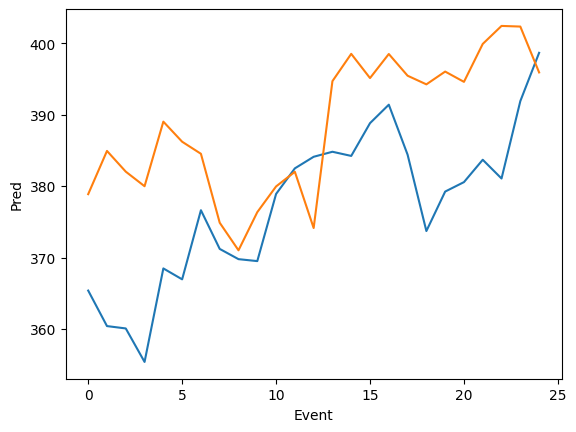

In [209]:
sns.lineplot(data = yhat, x = 'Event', y = 'Pred')
sns.lineplot(data = yhat, x = 'Event', y = 'Act')
plt.show()